**<font size="+3">03 Bearbeitung von Zeitreihen</font>**

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

<img src="pics/damian-zaleski-RYyr-k3Ysqg-unsplash.jpg" alt="Drawing" style="width: 700px;"/>

Foto von <a href="https://unsplash.com/de/@zal3wa?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Damian Zaleski</a> auf <a href="https://unsplash.com/de/fotos/apple-%EB%AC%B4%EC%84%A0-%ED%82%A4%EB%B3%B4%EB%93%9C%EC%97%90%EC%84%9C-%EC%9E%85%EB%A0%A5%ED%95%98%EB%8A%94-%EC%82%AC%EB%9E%8C-RYyr-k3Ysqg?utm_content=creditCopyText&utm_medium=referral&utm_source=unsplash">Unsplash</a>
  

In [2]:
import datetime

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
#from cycler import cycler

rcParams['figure.figsize']    = 18, 5        # figure size in inches, 1 Inch = 2.54 cm 
rcParams['axes.spines.top']   = False        # Axis spines: lines confining the plot area
rcParams['axes.spines.right'] = False        # Axis spines: lines confining the plot area
# rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

<i>Matplotlib: Visualization with Python</i><br>
https://matplotlib.org/

<i>Customizing Matplotlib with style sheets and rcParams</i><br>
https://matplotlib.org/stable/users/explain/customizing.html

# Einführung

<i>Pandas: support of time series, date functionality</i><br>
https://pandas.pydata.org/docs/user_guide/timeseries.html

<i>Time Series From Scratch — Introduction to Time Series with Pandas</i><br>
https://towardsdatascience.com/time-series-from-scratch-introduction-to-time-series-with-pandas-347ac9c6b451

Time Series Analysis: Resampling, Shifting and Rollingy<br>
https://towardsdatascience.com/time-series-analysis-resampling-shifting-and-rolling-f5664ddef77e

## Bearbeitung von Zeitreihen

https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining<br>
https://medium.com/dataprophet/mastering-time-series-a-beginner-journey-8c17194043e3

<ul>
<li>Bereits beim <b>Data Understanding</b> sind bei Zeitreihen Verarbeitungsschritte nötig,<br>
    bspw. um Daten visualisieren zu können.
    <li>Das gilt umso mehr Im Zuge von <b>Data Preparation</b>.
<li>Beispiel für Datenbarbeitungen bei Zeitreihen sind:
    <ul>
    <li>Formatierung der Daten
    <li>Dateibereinigungen
    <li>Behandlung fehlender Werte
    <li>Behandlung von Ausreißern
    <li>Veränderung der zeitlichen Auflösung
    <li>Interpolation
    <li>Zerlegung einer Zeitreihe in ihre Komponenten
    <li>....
    </ul>
</ul>

<b>
Neben der Vorverarbeitung gibt es eine Reihe von Operationen, die häufig bei Zeitreihen angewandt werden.<br>
Folgende Methoden werden hier vorgestellt:<br>
<ul>
    <li><i>resample()</i>: Methode speziell für Zeitreihen (Veränderung der zeitlichen Auflösung)
    <li><i>shift(), rolling(), diff()</i> allgemeinere Methoden für Daten mit definierter Reihenfolge.
</b>

## Verwendete Datei

<b>Verwendet wird hier eine Zeitreihen von Verkaufszahlen von Autos.</b><br>
* Die Datei LTOTALSA.csv gibt es unter https://fred.stlouisfed.org/series/LTOTALNSA
* Citation:<br>U.S. Bureau of Economic Analysis, Light Weight Vehicle Sales [LTOTALNSA], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/LTOTALNSA, September 21, 2023.

<i>Dokumentation zu pd.read_csv</i><br>
https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [4]:
df = pd.read_csv('data/LTOTALNSA.csv', index_col= 'DATE', parse_dates= True)
# index_col: Column(s) to use as row label(s)
# parse_dates: if True -> try parsing the index as date
df.head(3)

,LTOTALNSA
DATE,
1976-01-01,864.6
1976-02-01,973.3
1976-03-01,1216.1


In [5]:
df.shape

(571, 1)

In [6]:
df.index[0:2]

DatetimeIndex(['1976-01-01', '1976-02-01'], dtype='datetime64[ns]', name='DATE', freq=None)

In [7]:
df.index.freq = pd.infer_freq(df.index)
df.index[0:2]

DatetimeIndex(['1976-01-01', '1976-02-01'], dtype='datetime64[ns]', name='DATE', freq='MS')

# resample()

<i>Dokumentation pandas.DataFrame.resample</i><br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

<b>
<ul>
<li><u>Resampling:</u><br>
Ändern der zeitlichen Auflösung ("frequency conversion") +<br>Operation auf den zugehörigen Daten ("resampling operation").
<li><u>Downsampling:</u><br>
    Verkleinerung der Auflösung (Zeit-Gruppierung) + Aggregation der Werte der einzelnen Gruppe.
<li><u>Upsampling:</u><br>
Vergrößerung der Auflösung + Erzeugung zusätzlicher Daten für die neuen Zeitpunkte
</ul>
</b>   

**Eine spezielle Rolle spielt hier der Parameter "rule", dem die folgenden Aliasen zugewiesen werden können.**<br>
Diese Werte werden als <b>offset strings</b> bezeichnet, und definieren die gewünschte <b>frequency conversion</b>.<br>
In der Übersicht dieser <i>offset strings</i> sind die hier verwendeten in fett dargestellt.

| Alias(e)| Description of the frequency           |
| --------| ---------------------------------------|
| **D**   | calendar day                           |
| **ME**   | month end                              |
| **MS**  | month start                            |
| **Y**   | year end                               |
| B       | business day                           |
| C       | custom business day                    |
| W       | weekly                                 |
| SM      | semi-month end (15th and end of month) |
| BM      | business month end                     |
| CBM     | custom business month end              |
| SMS     | semi-month start (1st and 15th)        |
| BMS     | business month start                   |
| CBMS    | custom business month start            |
| Q       | quarter end                            |
| BQ      | business quarter end                   |
| QS      | quarter start                          |
| BQS     | business quarter start                 |
| AE, YE    | year end                               |
| BA, BY      | business year end                      |
| AS, **YS**  | year start                             |
| BAS, BYS| business year start                    |
| BH      | business hour                          |
| H       | hour                                   |
| T, min  | minute                                 |
| S       | second                                 |
| L, ms   | milliseconds                           |
| U, us   | microseconds                           |
| N       | nanoseconds                            |

## Downsampling (aggregation)

<img src="pics/downsampling-yildirim.JPG" alt="Drawing" style="width: 300px;"/>

https://towardsdatascience.com/time-series-analysis-resampling-shifting-and-rolling-f5664ddef77e

In [8]:
df_yearly_totals = df.resample(rule = 'YE').sum()
df_yearly_totals.head(2)

,LTOTALNSA
DATE,
1976-12-31,12969.8
1977-12-31,14481.9


In [9]:
df_yearly_totals = df.resample(rule = 'YS').sum()
df_yearly_totals.head(2)

,LTOTALNSA
DATE,
1976-01-01,12969.8
1977-01-01,14481.9


In [10]:
df_yearly_totals = df.resample(rule = 'YS').agg(['sum','mean','min','max']).round(0)
df_yearly_totals.head(2)

LTOTALNSA                       
                 sum    mean    min     max
DATE                                       
1976-01-01   12970.0  1081.0  865.0  1225.0
1977-01-01   14482.0  1207.0  945.0  1424.0

**Es ist auch möglich, verschiedenen Variablen (multivariat) jeweils beliebig wählbare Aggregationsfunktionen zuzuordnen:**  
.agg({ 'A': ['sum','std'], 'B': ['mean', 'max'] })

In [11]:
df_yearly_totals.index[0:8]

DatetimeIndex(['1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01'],
              dtype='datetime64[ns]', name='DATE', freq='YS-JAN')

Bei den Zeitabständen Woche, Monat und Jahr ist es möglich, diese zu verankern ("Anchored offsets").<br>
<i>A-DEC</i> bedeutet, dass das Jahr Ende Dezember endet.<br>
https://pandas.pydata.org/docs/user_guide/timeseries.html

In [12]:
df_yearly_totals.index = df_yearly_totals.index + pd.Timedelta(15,'day')
df_yearly_totals.head(2)

LTOTALNSA                       
                 sum    mean    min     max
DATE                                       
1976-01-16   12970.0  1081.0  865.0  1225.0
1977-01-16   14482.0  1207.0  945.0  1424.0

In [13]:
df_yearly_totals = df.resample(rule = 'YE').sum()
df_yearly_totals.head()

,LTOTALNSA
DATE,
1976-12-31,12969.8
1977-12-31,14481.9
1978-12-31,14981.0
1979-12-31,13758.4
1980-12-31,11197.5


In [14]:
df_quarterly_means = df.resample(rule='QE').mean()
df_quarterly_means.head()

,LTOTALNSA
DATE,
1976-03-31,1018.000000
1976-06-30,1188.066667
1976-09-30,1049.966667
1976-12-31,1067.233333
1977-03-31,1141.466667


In [15]:
df_quarterly_means.index

DatetimeIndex(['1976-03-31', '1976-06-30', '1976-09-30', '1976-12-31',
               '1977-03-31', '1977-06-30', '1977-09-30', '1977-12-31',
               '1978-03-31', '1978-06-30',
               ...
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30', '2022-09-30', '2022-12-31', '2023-03-31',
               '2023-06-30', '2023-09-30'],
              dtype='datetime64[ns]', name='DATE', length=191, freq='QE-DEC')

Q-DEC: quarterly frequency, year ends in December.

In [16]:
df_quarterly_means.index

DatetimeIndex(['1976-03-31', '1976-06-30', '1976-09-30', '1976-12-31',
               '1977-03-31', '1977-06-30', '1977-09-30', '1977-12-31',
               '1978-03-31', '1978-06-30',
               ...
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30', '2022-09-30', '2022-12-31', '2023-03-31',
               '2023-06-30', '2023-09-30'],
              dtype='datetime64[ns]', name='DATE', length=191, freq='QE-DEC')

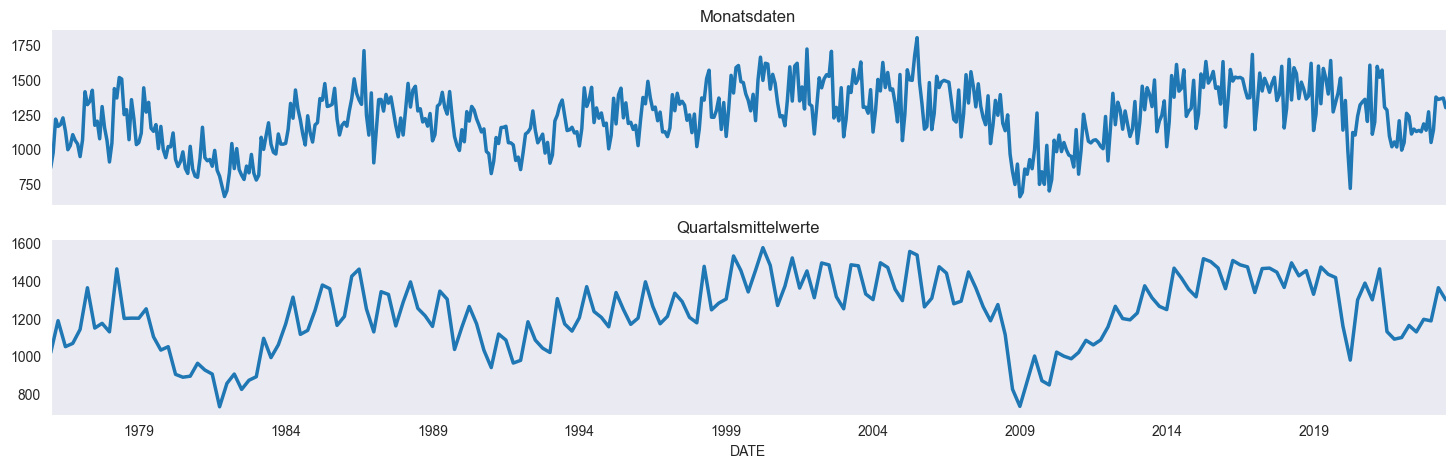

In [17]:
fix, ax = plt.subplots(2, sharex=True)
df.plot(ax=ax[0], legend = False, title = 'Monatsdaten')
df_quarterly_means.plot(ax=ax[1], legend = False, title = 'Quartalsmittelwerte')
ax[0].grid()
ax[1].grid();

## Upsampling

**Upsampling: Vergrößerung der zeitlichen Auflösung.**  
**Bei den hier angeführten Methoden ist wichtig, dass die ursprünglichen Zeitpunkte im Upsampling auch enthalten sind.**

Resampling der Monatsdaten auf einen Tag:

In [18]:
df.resample("d").asfreq().head(4)

,LTOTALNSA
DATE,
1976-01-01,864.6
1976-01-02,NaN
1976-01-03,NaN
1976-01-04,NaN


In [19]:
df.resample("d").ffill()[25:35]  # forward fill

,LTOTALNSA
DATE,
1976-01-26,864.6
1976-01-27,864.6
1976-01-28,864.6
1976-01-29,864.6
1976-01-30,864.6
1976-01-31,864.6
1976-02-01,973.3
1976-02-02,973.3
1976-02-03,973.3


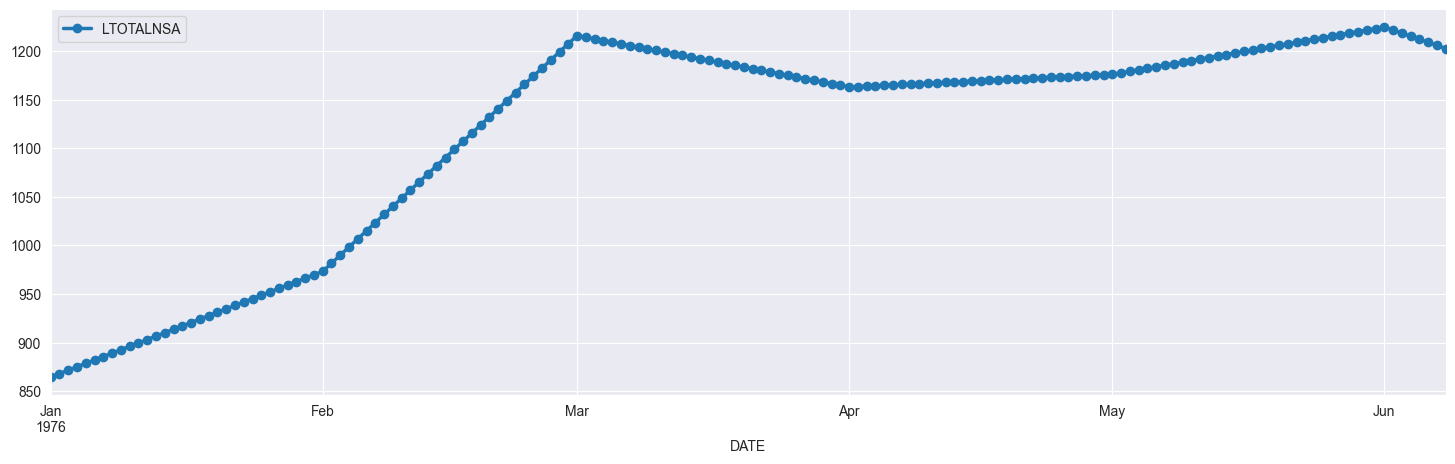

In [20]:
df.resample("d").interpolate(method='linear')[0:160].plot(marker='o');

# shift()

<i>Dokumentation pandas.DataFrame.shift</i><br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html

<b>Verschieben von Zeitreihen - (Lag-Operation)<br></b>

* $x_{t-k}\;$: $x_t$, das um $k$ Einheiten nach RECHTS verschoben wurde ($k>0$)<br>
* $x_{t-k}\;$ hat am Beginn ($x_1, ..., x_{k})$ keine Werte dafür am Ende ($x_{n+1},...,x_{n+k})$ zusätzliche Werte<br>
* die Ausmaß der zeitlichen Verschiebung $k$ wird als <b>Lag</b> bezeichnet</li>
</b>

In [21]:
df2 = df.copy()
df2['shift_pos1']= df2.LTOTALNSA.shift(1)
df2['shift_pos3']= df2.LTOTALNSA.shift(3)
df2['shift_neg1']= df2.LTOTALNSA.shift(-1)
df2.head(4)

,LTOTALNSA,shift_pos1,shift_pos3,shift_neg1
DATE,,,,
1976-01-01,864.6,NaN,NaN,973.3
1976-02-01,973.3,864.6,NaN,1216.1
1976-03-01,1216.1,973.3,NaN,1163.2
1976-04-01,1163.2,1216.1,864.6,1176.1


In [22]:
df2.tail(4)

,LTOTALNSA,shift_pos1,shift_pos3,shift_neg1
DATE,,,,
2023-04-01,1358.250,1375.194,1046.837,1363.447
2023-05-01,1363.447,1358.250,1138.635,1368.178
2023-06-01,1368.178,1363.447,1375.194,1298.862
2023-07-01,1298.862,1368.178,1358.250,NaN


**Bemerkung:  
In den DataFrames wird am Ende oder am Anfang wird der Zeitindex nicht automatisch vergrößert.  
D.h. es verschwinden Werte.**

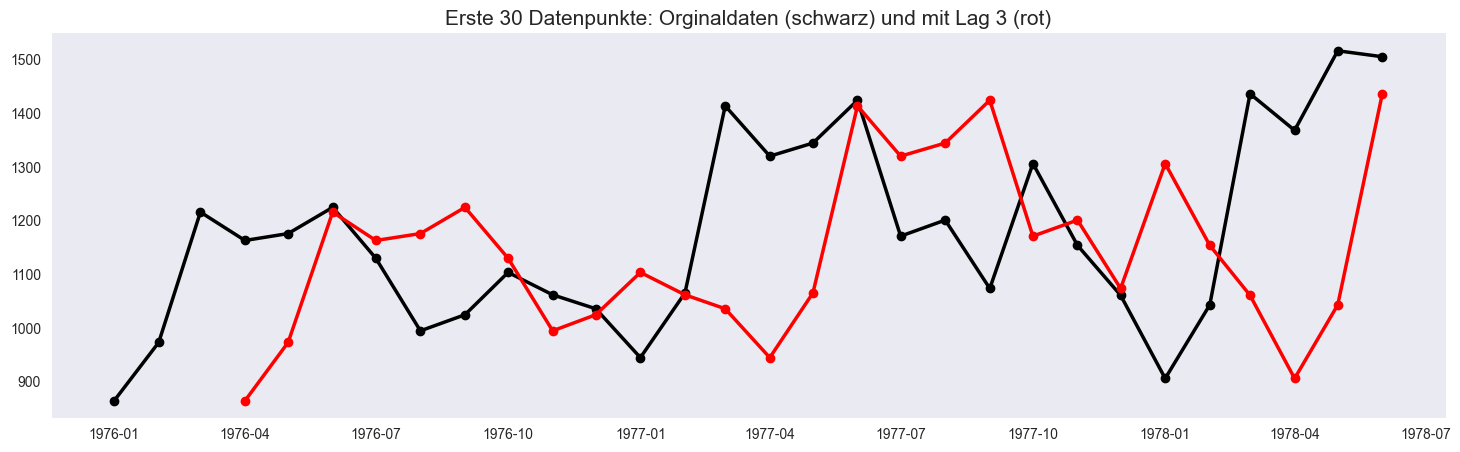

In [23]:
plt.plot(df2.LTOTALNSA[0:30], linestyle='-', marker='o', color='black')
plt.plot(df2.shift_pos3[0:30], linestyle='-', marker='o',color='red')
plt.title('Erste 30 Datenpunkte: Orginaldaten (schwarz) und mit Lag 3 (rot)', size=15)
plt.grid();

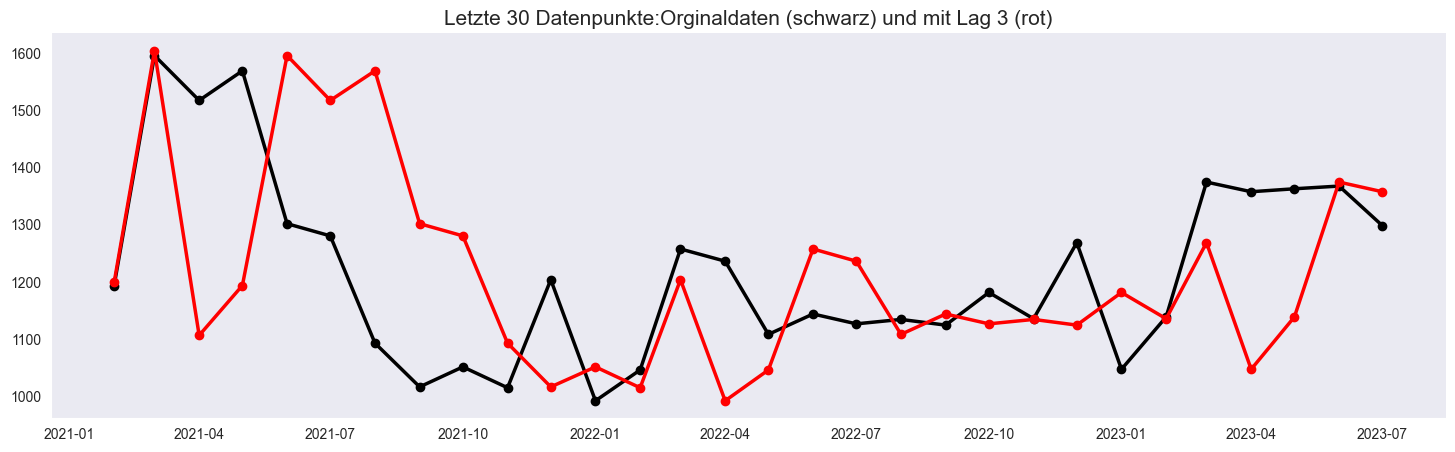

In [24]:
plt.plot(df2.LTOTALNSA.iloc[-30:], linestyle='-', marker='o', color='black')
plt.plot(df2.shift_pos3.iloc[-30:], linestyle='-', marker='o',color='red')
plt.title('Letzte 30 Datenpunkte:Orginaldaten (schwarz) und mit Lag 3 (rot)', size=15)
plt.grid();

# rolling()

<i>Dokumentation pandas.DataFrame.rolling</i><br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

<img src="pics/rollingwindow-yildirim.JPG" alt="Drawing" style="width: 300px;"/>

#https://towardsdatascience.com/time-series-analysis-resampling-shifting-and-rolling-f5664ddef77e

**Ein 'rolling window' wird über die gewählte Datenspalte gelegt, und die gewünschte Operation wird durchgeführt.**  
**Bspw. wird mit der Mittelwertbildung (moving average) so die ursprüngliche Zeitreihe geglättet.**

In [25]:
df3 = df.copy()
df3['roll_q'] = df3.LTOTALNSA.rolling(window = 3).mean()
df3.head(5)

,LTOTALNSA,roll_q
DATE,,
1976-01-01,864.6,NaN
1976-02-01,973.3,NaN
1976-03-01,1216.1,1018.000000
1976-04-01,1163.2,1117.533333
1976-05-01,1176.1,1185.133333


In [26]:
df3 = df.copy()
df3['roll_q'] = df3.LTOTALNSA.rolling(window = 3, center = True).mean()
df3.head(5)

,LTOTALNSA,roll_q
DATE,,
1976-01-01,864.6,NaN
1976-02-01,973.3,1018.000000
1976-03-01,1216.1,1117.533333
1976-04-01,1163.2,1185.133333
1976-05-01,1176.1,1188.066667


# diff()

## Differencing

<i>Dokumenation pandas.DataFrame.diff</i><br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html

<i>Dokumenation numpy.diff</i><br>
https://numpy.org/doc/stable/reference/generated/numpy.diff.html

<b>
<ul>
<li>wird bspw. ausgeführt, um aus einer nicht-stationären Zeitreihe eine stationäre Zeitreihe zu machen.
<li>Differencing ist der Ableitung bei kontinuierlichen Funktion sehr ähnlich, und entspricht der Berechnung eines Differentialquotienten.
<li>Differenz erster Ordnung = aktueller Wert - Vorperiodenwert
<li>Differenz erster Ordnung ist so etwas wie die Steigung oder der Anstieg zum Vorwert.
<li>Die Differenzierung kann wiederholt angewendet werden => Differenz n-ter Ordnung
</ul>

In [27]:
df4 = df.copy()
# Das ist eine saisonale und keine mehrfache Differenzierung!
df4['diff_1'] = df4.LTOTALNSA.diff(1)
df4['diff_2'] = df4.LTOTALNSA.diff(2)
df4['diff_3'] = df4.LTOTALNSA.diff(3)
df4.head()

,LTOTALNSA,diff_1,diff_2,diff_3
DATE,,,,
1976-01-01,864.6,NaN,NaN,NaN
1976-02-01,973.3,108.7,NaN,NaN
1976-03-01,1216.1,242.8,351.5,NaN
1976-04-01,1163.2,-52.9,189.9,298.6
1976-05-01,1176.1,12.9,-40.0,202.8


Das diff von Pandas ist gut geeignet, um eine <b>saisonale Differenzierung</b> durchzuführen.<br>
Dabei wird bspw. die Zeitreihe "Monatsverkäufe" in die neue Zeitreihe "Verkaufsänderung zum Vorjahresmonat" transformiert.<br>
Das geht mit: df4.LTOTALNSA.diff(12).

Das diff von Numpy ist gut geeignet um <b>höhere Differenzierungen</b> durchzuführen.<br>
Saisonale Differenzierungen sind aber damit nicht möglich.

In [28]:
np.diff(df4.LTOTALNSA, n=2)[0:4]

array([ 134.1, -295.7,   65.8,   35.9])

## Invert Differencing

<b>
<ul>
<li>Eine Differenzierung muss auch umgekehrt werden ("integrieren")
<li>Hier wird ein Beispielcode dargestellt, um das Prinzip zu erklären
<li>Um die Differenzierung rückgängig zu machen, ist ein Startwert für den Absolutwert nötig.
<li>Dabei wird numpy.r_ verwendet - damit lassen sich Objekte zusammenfügen.
</ul>
</b>

<i>Dokumentation numpy.r_</i><br>
https://numpy.org/doc/stable/reference/generated/numpy.r_.html

### Differenzierung n=1

In [29]:
startvalue = df.LTOTALNSA[0]
startvalue

C:\Users\nylux\AppData\Local\Temp\ipykernel_20152\3639071722.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  startvalue = df.LTOTALNSA[0]


np.float64(864.6)

In [30]:
diffvalues = df4.diff_1.iloc[1:]   # ohne den ersten NA-Wert!
diffvalues.head(2)

DATE
1976-02-01    108.7
1976-03-01    242.8
Freq: MS, Name: diff_1, dtype: float64

In [31]:
df4['inv_diff_1'] = np.r_[startvalue, diffvalues].cumsum()

In [32]:
df4.head(10)

,LTOTALNSA,diff_1,diff_2,diff_3,inv_diff_1
DATE,,,,,
1976-01-01,864.6,NaN,NaN,NaN,864.6
1976-02-01,973.3,108.7,NaN,NaN,973.3
1976-03-01,1216.1,242.8,351.5,NaN,1216.1
1976-04-01,1163.2,-52.9,189.9,298.6,1163.2
1976-05-01,1176.1,12.9,-40.0,202.8,1176.1
1976-06-01,1224.9,48.8,61.7,8.8,1224.9
1976-07-01,1130.1,-94.8,-46.0,-33.1,1130.1
1976-08-01,994.9,-135.2,-230.0,-181.2,994.9
1976-09-01,1024.9,30.0,-105.2,-200.0,1024.9


### Differenzierung n>1

Die Invertierung einer saisonalen Differenzierung ist etwas schwieriger.<br>
Im Internet habe ich nichts darüber gefunden.<br>
Wenn jemand einen besseren Code findet - bitte mitteilen!

In [33]:
# Invertierung für jeden nten Datensatz

n = 3
Y = list()
maxshape = 0
for i in range(n):
    X = np.r_[df4.LTOTALNSA.iloc[i] , df4[n+i::n].diff_3].cumsum().tolist()
    Y.append(X)

In [34]:
# Zusammenführung der nten Datensätze

result = []
for i in range(571//n):
    for j in range(n):
        result.append(Y[j][i])
        
for i in range(571%n):
    result.append(Y[i][ 571//n ])

In [35]:
df4['inv_diff_3'] = result

In [36]:
df4.head(5)

,LTOTALNSA,diff_1,diff_2,diff_3,inv_diff_1,inv_diff_3
DATE,,,,,,
1976-01-01,864.6,NaN,NaN,NaN,864.6,864.6
1976-02-01,973.3,108.7,NaN,NaN,973.3,973.3
1976-03-01,1216.1,242.8,351.5,NaN,1216.1,1216.1
1976-04-01,1163.2,-52.9,189.9,298.6,1163.2,1163.2
1976-05-01,1176.1,12.9,-40.0,202.8,1176.1,1176.1


In [37]:
df4.tail(5)

,LTOTALNSA,diff_1,diff_2,diff_3,inv_diff_1,inv_diff_3
DATE,,,,,,
2023-03-01,1375.194,236.559,328.357,106.297,1375.194,1375.194
2023-04-01,1358.250,-16.944,219.615,311.413,1358.250,1358.250
2023-05-01,1363.447,5.197,-11.747,224.812,1363.447,1363.447
2023-06-01,1368.178,4.731,9.928,-7.016,1368.178,1368.178
2023-07-01,1298.862,-69.316,-64.585,-59.388,1298.862,1298.862


# Visualisierung von Zeitreihen

<b>Visualisierung ist bei Zeitreihen absolut unverzichtbar.</b><br>
<b>Es gibt in Python verschiedene Libraries für Visualisierungen - hier wird nur matplotlib und später etwas Plotly verwendet.</b>

In [38]:
df['diff1'] = df.LTOTALNSA.diff()

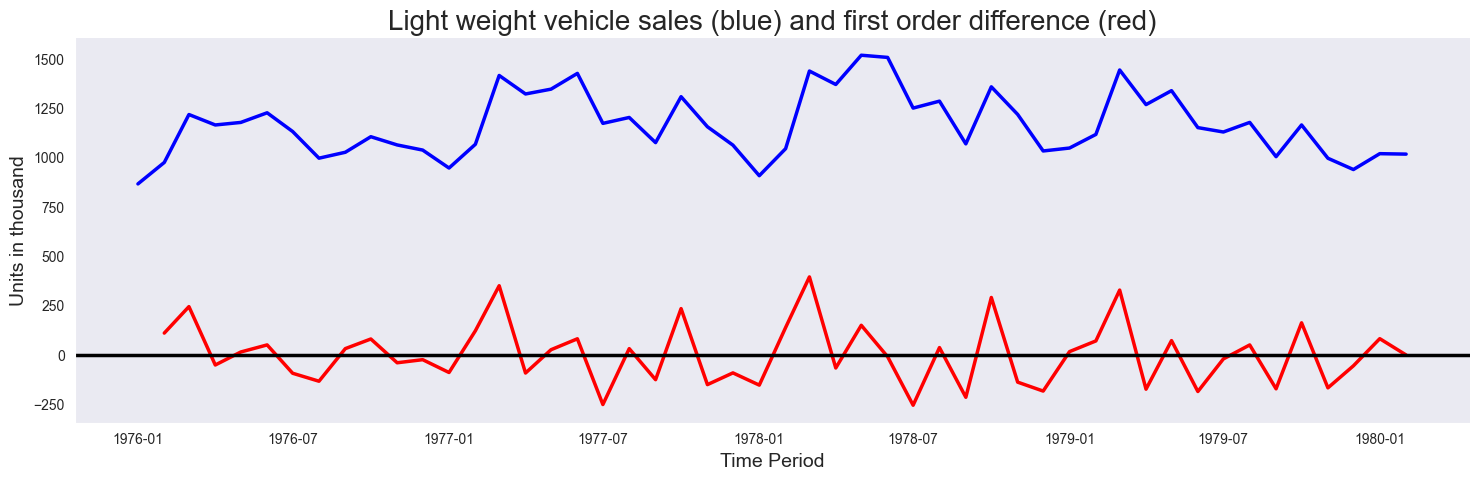

In [39]:
plt.title('Light weight vehicle sales (blue) and first order difference (red)', size=20)
plt.xlabel('Time Period', size=14)
plt.ylabel('Units in thousand', size=14)

# das Semikolon am Ende ersetzt das plt.show() - sehr praktisch!
plt.plot(df.LTOTALNSA[0:50],  color='blue')
plt.plot(df.diff1[0:50],  color='red')
plt.axhline(y=0, color='black', linestyle='-')
plt.grid();

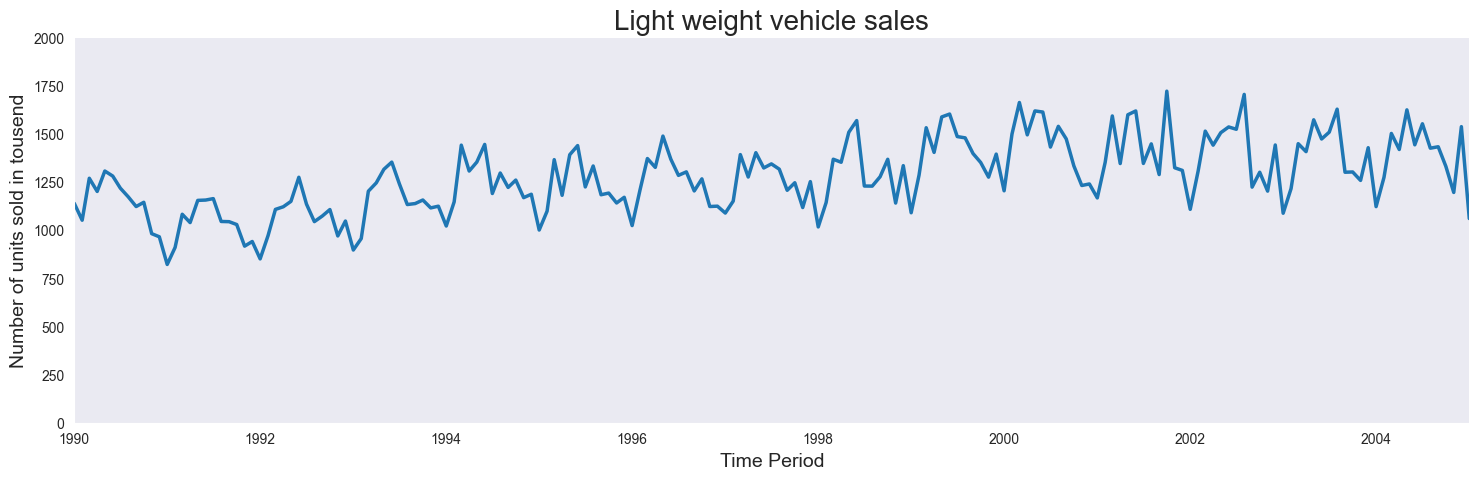

In [40]:
plt.title('Light weight vehicle sales', size=20)
plt.xlabel('Time Period', size=14)
plt.ylabel('Number of units sold in tousend', size=14)
plt.xlim(np.array(['1990-01-01', '2005-01-01'], dtype='datetime64'))
plt.ylim([0, 2000])
plt.plot(df.LTOTALNSA)
plt.grid();

# Übungsaufgaben

## Visualisiere die Verkäufe mit einem 'rolling average' (zentriert, 5 Perioden)

## Erzeuge ein Balkendiagramm mit jährlichen Verkaufszahlen.